In [7]:
import polars as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn.objects as so
import seaborn as sns
from matplotlib import style

sns.set_style("whitegrid")

In [8]:
def get_data(dataset):
    data = pd.read_csv(dataset)
    return data

In [9]:
data = get_data(
    "https://raw.githubusercontent.com/Utshav-paudel/10-data-analysis-project/d7379235a8d48290c5333b83685d6fca76b5f2f9/dataset/2.%20Cars%20Data1.csv"
)

In [ ]:
assert data.shape == (432, 15)

## Plot distribution of numerical variables

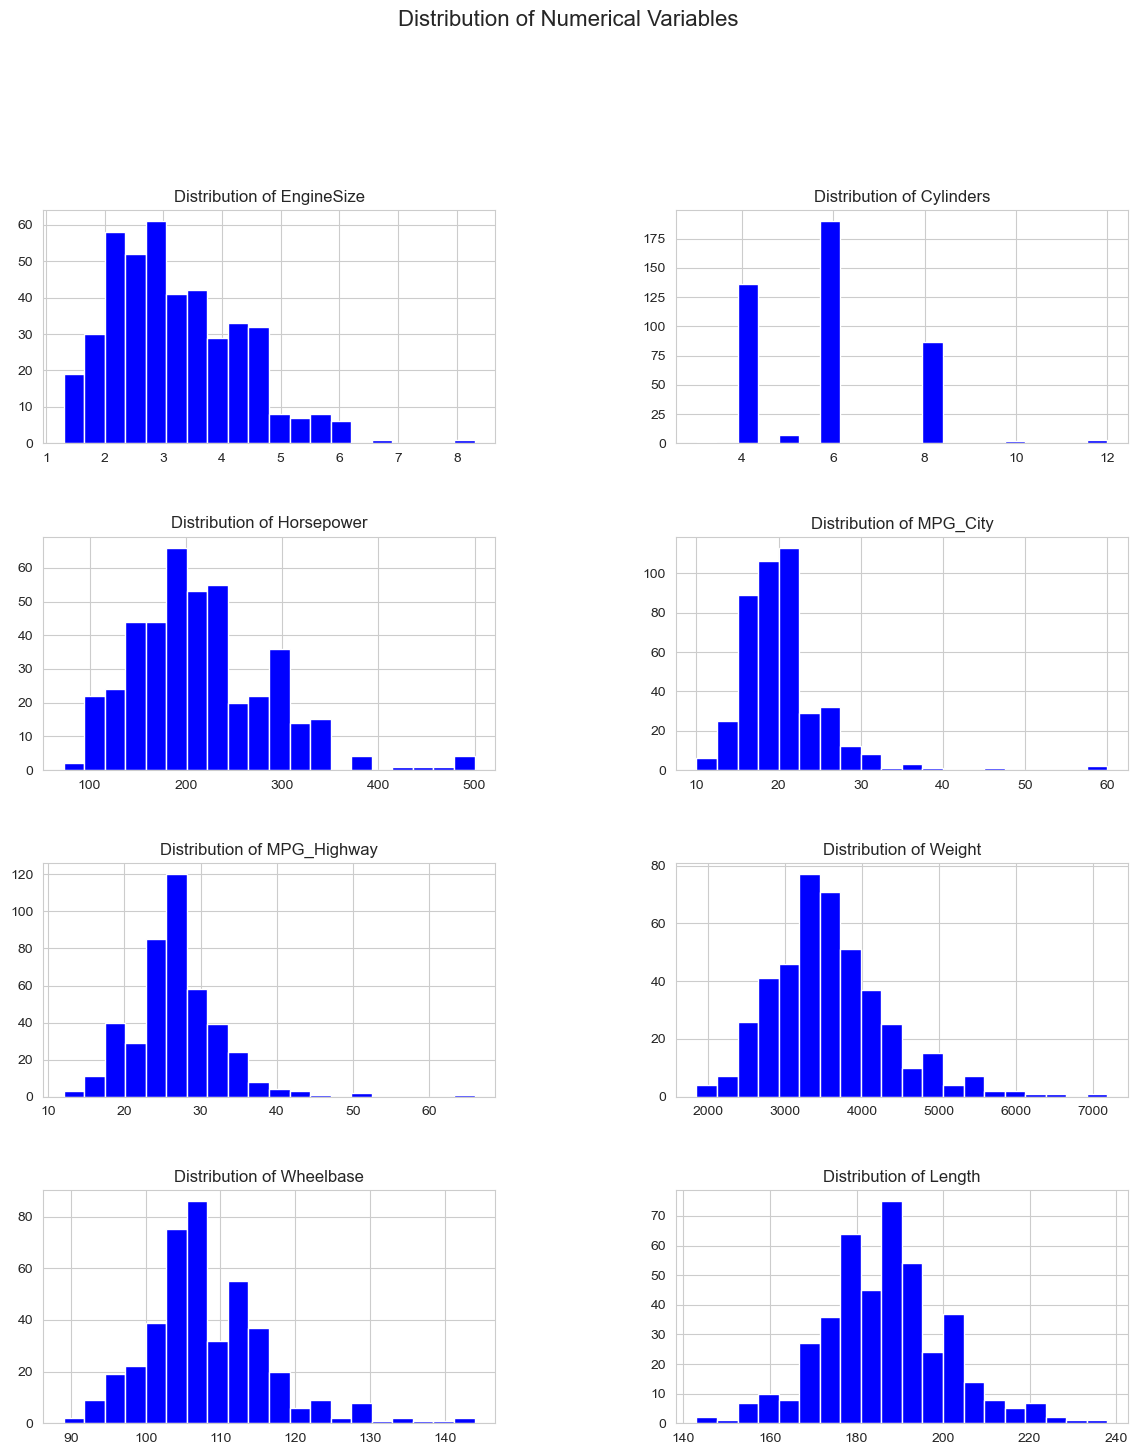

In [37]:
def plot_all_vars(data):
    numeric_columns = data.select(
        [pd.col(c) for c in data.columns if data[c].dtype in [pd.Float64, pd.Int64]]
    )
    num_columns = numeric_columns.columns
    fig, axes = plt.subplots(
        len(num_columns) // 2 + 1, 2, figsize=(14, 20)
    )  # 2 columns layout

    axes = axes.flatten()

    for i, col in enumerate(num_columns):
        axes[i].hist(numeric_columns[col].to_numpy(), bins=20, color="blue")
        axes[i].set_title(f"Distribution of {col}")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle("Distribution of Numerical Variables", fontsize=16)
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.savefig("All_features_distribution.png")
    plt.show()


plot_all_vars(data)

One column histogram

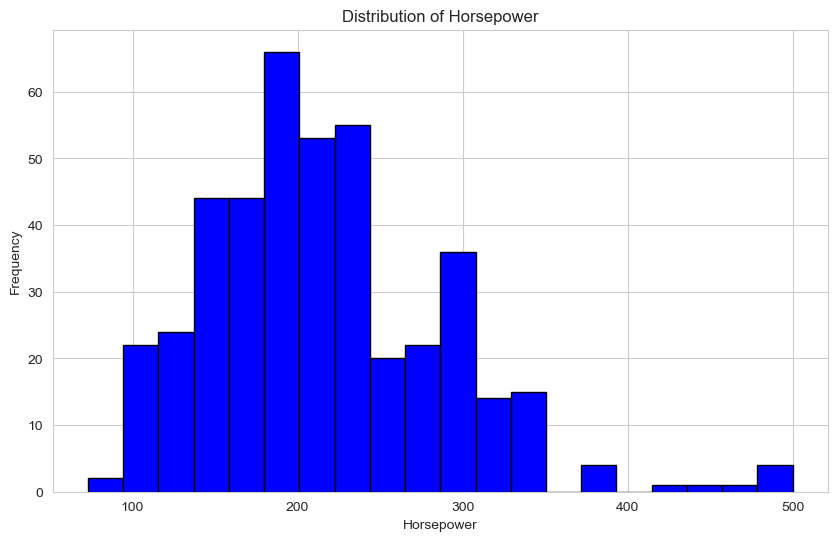

In [24]:
def create_histogram(df, column="Horsepower"):
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=20, color="blue", edgecolor="black")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.savefig(f"{column}_histogram.png")
    plt.show()


create_histogram(data)

## Summary statistics

In [25]:
def summary(df):
    return df.describe()


summary(data)

statistic,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""428""","""428""","""428""","""428""","""428""","""428""","""428""",428.0,426.0,428.0,428.0,428.0,428.0,428.0,428.0
"""null_count""","""4""","""4""","""4""","""4""","""4""","""4""","""4""",4.0,6.0,4.0,4.0,4.0,4.0,4.0,4.0
"""mean""",null,null,null,null,null,null,null,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.36215
"""std""",null,null,null,null,null,null,null,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
"""min""","""Acura""","""3.5 RL 4dr""","""Hybrid""","""Asia""","""All""","""$10,280 ""","""$10,107 """,1.3,3.0,73.0,10.0,12.0,1850.0,89.0,143.0
"""25%""",null,null,null,null,null,null,null,2.4,4.0,165.0,17.0,24.0,3105.0,103.0,178.0
"""50%""",null,null,null,null,null,null,null,3.0,6.0,210.0,19.0,26.0,3476.0,107.0,187.0
"""75%""",null,null,null,null,null,null,null,3.9,6.0,255.0,21.0,29.0,3977.0,112.0,194.0
"""max""","""Volvo""","""xB""","""Wagon""","""USA""","""Rear""","""$94,820 ""","""$9,875 """,8.3,12.0,500.0,60.0,66.0,7190.0,144.0,238.0


## Correlation matrix 

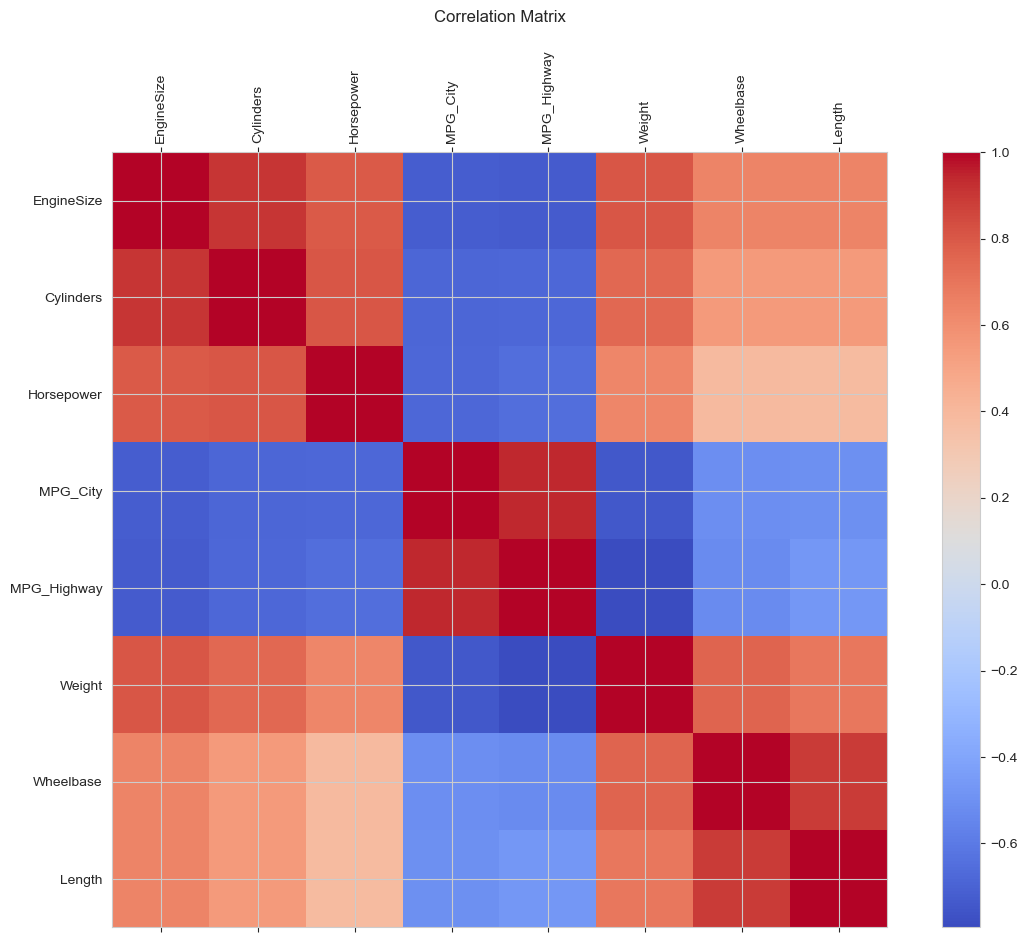

In [36]:
def correlation_matrix(df):
    # Select only numeric columns (floats and ints)
    numeric_columns = df.select(
        [pd.col(c) for c in df.columns if df[c].dtype in [pd.Float64, pd.Int64]]
    )

    # Drop rows with missing values (optional, but helpful)
    numeric_columns = numeric_columns.drop_nulls()

    # Check if the dataframe has any numeric columns
    if len(numeric_columns.columns) == 0:
        print("No numeric columns found in the dataset.")
        return

    # Compute correlation matrix
    corr_matrix = np.corrcoef(
        [numeric_columns[col].to_numpy() for col in numeric_columns.columns]
    )

    # Plot the correlation matrix
    plt.figure(figsize=(14, 10))
    plt.matshow(
        corr_matrix, cmap="coolwarm", fignum=1
    )  # fignum=1 avoids creating a new figure
    plt.title("Correlation Matrix", pad=20)
    plt.colorbar()
    plt.xticks(
        ticks=np.arange(len(numeric_columns.columns)),
        labels=numeric_columns.columns,
        rotation=90,
    )
    plt.yticks(
        ticks=np.arange(len(numeric_columns.columns)), labels=numeric_columns.columns
    )
    plt.savefig("correlation_matrix_polars.png")
    plt.show()


correlation_matrix(data)